In [21]:
#Reader for Suicide File
import pandas as pd
from collections import OrderedDict
import numpy as np
import matplotlib.pyplot as plt

# main suicide csv load and clean-up
csv_path = "../Resources/reviseddata.csv"
suicide_df = pd.read_csv(csv_path, low_memory=False)
suicide_df2 = suicide_df.dropna()
suicide_df2
# happiness df load by year
csv_path = "../Resources/Happiness_Reports/2015.csv"
happy15_df = pd.read_csv(csv_path, low_memory=False)
csv_path = "../Resources/Happiness_Reports/2016.csv"
happy16_df = pd.read_csv(csv_path, low_memory=False)
csv_path = "../Resources/Happiness_Reports/2017.csv"
happy17_df = pd.read_csv(csv_path, low_memory=False)
csv_path = "../Resources/Happiness_Reports/2018.csv"
happy18_df = pd.read_csv(csv_path, low_memory=False)

# put suffix on columns
happy15_df.columns = happy15_df.columns.map(lambda x: str(x) + "_15")
happy16_df.columns = happy16_df.columns.map(lambda x: str(x) + "_16")
happy17_df.columns = happy17_df.columns.map(lambda x: str(x) + "_17")
happy18_df.columns = happy18_df.columns.map(lambda x: str(x) + "_18")

# merge df's into one
merge_df = pd.merge(suicide_df2, happy15_df, left_on='Country Name',right_on='Country_15', suffixes=('suicide15','happy15'))
merge_df2 = pd.merge(merge_df, happy16_df, left_on='Country Name',right_on='Country_16', suffixes=('suicide16','happy16'))
merge_df3 = pd.merge(merge_df2, happy17_df, left_on='Country Name',right_on='Country_17', suffixes=('suicide17','happy17'))
merge_df4 = pd.merge(merge_df3, happy18_df, left_on='Country Name',right_on='Country or region_18', suffixes=('suicide18','happy18'))

# list of columns to rearrange
pops=[ '2015', '2016', '2017', '2018','Country_15',
 'Region_15',
 'Happiness Rank_15',
 'Happiness Score_15',
 'Standard Error_15',
 'Economy (GDP per Capita)_15',
 'Family_15',
 'Health (Life Expectancy)_15',
 'Freedom_15',
 'Trust (Government Corruption)_15',
 'Generosity_15',
 'Dystopia Residual_15',
 'Country_16',
 'Region_16',
 'Happiness Rank_16',
 'Happiness Score_16',
 'Lower Confidence Interval_16',
 'Upper Confidence Interval_16',
 'Economy (GDP per Capita)_16',
 'Family_16',
 'Health (Life Expectancy)_16',
 'Freedom_16',
 'Trust (Government Corruption)_16',
 'Generosity_16',
 'Dystopia Residual_16',
 'Country_17',
 'Happiness.Rank_17',
 'Happiness.Score_17',
 'Whisker.high_17',
 'Whisker.low_17',
 'Economy..GDP.per.Capita._17',
 'Family_17',
 'Health..Life.Expectancy._17',
 'Freedom_17',
 'Generosity_17',
 'Trust..Government.Corruption._17',
 'Dystopia.Residual_17',
 'Overall rank_18',
 'Country or region_18',
 'Score_18',
 'GDP per capita_18',
 'Social support_18',
 'Healthy life expectancy_18',
 'Freedom to make life choices_18',
 'Generosity_18',
 'Perceptions of corruption_18']
cols = list(merge_df4.columns.values)

# pop columns
for col in pops:
       cols.pop(cols.index(col))

#return to correct order
mergedfinaldf = merge_df4[cols+['2015', 'Country_15',
 'Region_15',
 'Happiness Rank_15',
 'Happiness Score_15',
 'Standard Error_15',
 'Economy (GDP per Capita)_15',
 'Family_15',
 'Health (Life Expectancy)_15',
 'Freedom_15',
 'Trust (Government Corruption)_15',
 'Generosity_15',
 'Dystopia Residual_15','2016','Country_16',
 'Region_16',
 'Happiness Rank_16',
 'Happiness Score_16',
 'Lower Confidence Interval_16',
 'Upper Confidence Interval_16',
 'Economy (GDP per Capita)_16',
 'Family_16',
 'Health (Life Expectancy)_16',
 'Freedom_16',
 'Trust (Government Corruption)_16',
 'Generosity_16',
 'Dystopia Residual_16','2017', 'Country_17',
 'Happiness.Rank_17',
 'Happiness.Score_17',
 'Whisker.high_17',
 'Whisker.low_17',
 'Economy..GDP.per.Capita._17',
 'Family_17',
 'Health..Life.Expectancy._17',
 'Freedom_17',
 'Generosity_17',
 'Trust..Government.Corruption._17',
 'Dystopia.Residual_17','2018',
 'Overall rank_18',
 'Country or region_18',
 'Score_18',
 'GDP per capita_18',
 'Social support_18',
 'Healthy life expectancy_18',
 'Freedom to make life choices_18',
 'Generosity_18',
 'Perceptions of corruption_18']]




# individual years
merged2015df = mergedfinaldf.drop(['Total', 'Max', 'Min', 'Avg', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2019', '2016', 'Country_16', 'Region_16',
       'Happiness Rank_16', 'Happiness Score_16',
       'Lower Confidence Interval_16', 'Upper Confidence Interval_16',
       'Economy (GDP per Capita)_16', 'Family_16',
       'Health (Life Expectancy)_16', 'Freedom_16',
       'Trust (Government Corruption)_16', 'Generosity_16',
       'Dystopia Residual_16', '2017', 'Country_17', 'Happiness.Rank_17',
       'Happiness.Score_17', 'Whisker.high_17', 'Whisker.low_17',
       'Economy..GDP.per.Capita._17', 'Family_17',
       'Health..Life.Expectancy._17', 'Freedom_17', 'Generosity_17',
       'Trust..Government.Corruption._17', 'Dystopia.Residual_17', '2018',
       'Overall rank_18', 'Country or region_18', 'Score_18',
       'GDP per capita_18', 'Social support_18', 'Healthy life expectancy_18',
       'Freedom to make life choices_18', 'Generosity_18',
       'Perceptions of corruption_18'],axis=1)
merged2015df.columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2015_Suicides/100k', 'Country_15', 'Region_15', 'Happiness Rank_15',
       'Happiness Score_15', 'Standard Error_15',
       'Economy (GDP per Capita)_15', 'Family_15',
       'Health (Life Expectancy)_15', 'Freedom_15',
       'Trust (Government Corruption)_15', 'Generosity_15',
       'Dystopia Residual_15']
merged2016df = mergedfinaldf.drop(['Total', 'Max', 'Min', 'Avg', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2019', '2015', 'Country_15', 'Region_15', 'Happiness Rank_15',
       'Happiness Score_15', 'Standard Error_15',
       'Economy (GDP per Capita)_15', 'Family_15',
       'Health (Life Expectancy)_15', 'Freedom_15',
       'Trust (Government Corruption)_15', 'Generosity_15',
       'Dystopia Residual_15', '2017', 'Country_17', 'Happiness.Rank_17',
       'Happiness.Score_17', 'Whisker.high_17', 'Whisker.low_17',
       'Economy..GDP.per.Capita._17', 'Family_17',
       'Health..Life.Expectancy._17', 'Freedom_17', 'Generosity_17',
       'Trust..Government.Corruption._17', 'Dystopia.Residual_17', '2018',
       'Overall rank_18', 'Country or region_18', 'Score_18',
       'GDP per capita_18', 'Social support_18', 'Healthy life expectancy_18',
       'Freedom to make life choices_18', 'Generosity_18',
       'Perceptions of corruption_18'],axis=1)
merged2016df.columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2016_Suicides/100k', 'Country_16', 'Region_16', 'Happiness Rank_16',
       'Happiness Score_16', 'Lower Confidence Interval_16',
       'Upper Confidence Interval_16', 'Economy (GDP per Capita)_16',
       'Family_16', 'Health (Life Expectancy)_16', 'Freedom_16',
       'Trust (Government Corruption)_16', 'Generosity_16',
       'Dystopia Residual_16']
merged2017df = mergedfinaldf.drop(['Total', 'Max', 'Min', 'Avg', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2019', '2015', 'Country_15', 'Region_15', 'Happiness Rank_15',
       'Happiness Score_15', 'Standard Error_15',
       'Economy (GDP per Capita)_15', 'Family_15',
       'Health (Life Expectancy)_15', 'Freedom_15',
       'Trust (Government Corruption)_15', 'Generosity_15',
       'Dystopia Residual_15', '2016', 'Country_16', 'Region_16',
       'Happiness Rank_16', 'Happiness Score_16',
       'Lower Confidence Interval_16', 'Upper Confidence Interval_16',
       'Economy (GDP per Capita)_16', 'Family_16',
       'Health (Life Expectancy)_16', 'Freedom_16',
       'Trust (Government Corruption)_16', 'Generosity_16',
       'Dystopia Residual_16', '2018',
       'Overall rank_18', 'Country or region_18', 'Score_18',
       'GDP per capita_18', 'Social support_18', 'Healthy life expectancy_18',
       'Freedom to make life choices_18', 'Generosity_18',
       'Perceptions of corruption_18'],axis=1)
merged2017df.columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2017_Suicides/100k', 'Country_17', 'Happiness.Rank_17', 'Happiness.Score_17',
       'Whisker.high_17', 'Whisker.low_17', 'Economy..GDP.per.Capita._17',
       'Family_17', 'Health..Life.Expectancy._17', 'Freedom_17',
       'Generosity_17', 'Trust..Government.Corruption._17',
       'Dystopia.Residual_17']
merged2018df = mergedfinaldf.drop(['Total', 'Max', 'Min', 'Avg', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2019', '2015', 'Country_15', 'Region_15', 'Happiness Rank_15',
       'Happiness Score_15', 'Standard Error_15',
       'Economy (GDP per Capita)_15', 'Family_15',
       'Health (Life Expectancy)_15', 'Freedom_15',
       'Trust (Government Corruption)_15', 'Generosity_15',
       'Dystopia Residual_15', '2016', 'Country_16', 'Region_16',
       'Happiness Rank_16', 'Happiness Score_16',
       'Lower Confidence Interval_16', 'Upper Confidence Interval_16',
       'Economy (GDP per Capita)_16', 'Family_16',
       'Health (Life Expectancy)_16', 'Freedom_16',
       'Trust (Government Corruption)_16', 'Generosity_16',
       'Dystopia Residual_16', '2017', 'Country_17', 'Happiness.Rank_17',
       'Happiness.Score_17', 'Whisker.high_17', 'Whisker.low_17',
       'Economy..GDP.per.Capita._17', 'Family_17',
       'Health..Life.Expectancy._17', 'Freedom_17', 'Generosity_17',
       'Trust..Government.Corruption._17', 'Dystopia.Residual_17'],axis=1)
merged2018df.columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2018_Suicides/100k', 'Overall rank_18', 'Country or region_18', 'Score_18',
       'GDP per capita_18', 'Social support_18', 'Healthy life expectancy_18',
       'Freedom to make life choices_18', 'Generosity_18',
       'Perceptions of corruption_18']
mergedfinalfiltered = mergedfinaldf.drop(['2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2019'],axis=1)
# suicide filtered file
suicide_filtered = suicide_df2.drop(['Total', 'Max', 'Min', 'Avg', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2019'],axis=1)


dflist = ['mergedfinaldf','merged2015df','merged2016df','merged2017df','merged2018df','mergedfinalfiltered','suicide_filtered']



In [22]:
import pandas as pd

In [23]:
pd.set_option('display.max_columns', None)

In [24]:
mergedfinalfiltered

,Country Name,Country Code,Indicator Name,Indicator Code,Total,Max,Min,Avg,2015,Country_15,Region_15,Happiness Rank_15,Happiness Score_15,Standard Error_15,Economy (GDP per Capita)_15,Family_15,Health (Life Expectancy)_15,Freedom_15,Trust (Government Corruption)_15,Generosity_15,Dystopia Residual_15,2016,Country_16,Region_16,Happiness Rank_16,Happiness Score_16,Lower Confidence Interval_16,Upper Confidence Interval_16,Economy (GDP per Capita)_16,Family_16,Health (Life Expectancy)_16,Freedom_16,Trust (Government Corruption)_16,Generosity_16,Dystopia Residual_16,2017,Country_17,Happiness.Rank_17,Happiness.Score_17,Whisker.high_17,Whisker.low_17,Economy..GDP.per.Capita._17,Family_17,Health..Life.Expectancy._17,Freedom_17,Generosity_17,Trust..Government.Corruption._17,Dystopia.Residual_17,2018,Overall rank_18,Country or region_18,Score_18,GDP per capita_18,Social support_18,Healthy life expectancy_18,Freedom to make life choices_18,Generosity_18,Perceptions of corruption_18
0,Afghanistan,AFG,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,89.2,5,3.9,4.46,4.0,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,4.0,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,4.1,Afghanistan,141,3.794,3.873661,3.714338,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158,2.150801,4.1,145,Afghanistan,3.632,0.332,0.537,0.255,0.085,0.191,0.036
1,Angola,AGO,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,146.2,8.8,6,7.31,6.5,Angola,Sub-Saharan Africa,137,4.033,0.04758,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939,6.2,Angola,Sub-Saharan Africa,141,3.866,3.753,3.979,0.84731,0.66366,0.04991,0.00589,0.08434,0.12071,2.09459,6.0,Angola,140,3.795,3.951642,3.638358,0.858428,1.104412,0.049869,0.000000,0.097926,0.069720,1.614482,6.0,142,Angola,3.795,0.730,1.125,0.269,0.000,0.079,0.061
2,Albania,ALB,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,117.5,8.2,4.3,5.88,4.8,Albania,Central and Eastern Europe,95,4.959,0.05013,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894,4.7,Albania,Central and Eastern Europe,109,4.655,4.546,4.764,0.95530,0.50163,0.73007,0.31866,0.05301,0.16840,1.92816,4.7,Albania,109,4.644,4.752464,4.535536,0.996193,0.803685,0.731160,0.381499,0.201313,0.039864,1.490442,4.5,112,Albania,4.586,0.916,0.817,0.790,0.419,0.149,0.032
3,United Arab Emirates,ARE,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,151.4,8.6,5.6,7.57,6.5,United Arab Emirates,Middle East and Northern Africa,20,6.901,0.03729,1.42727,1.12575,0.80925,0.64157,0.38583,0.26428,2.24743,6.0,United Arab Emirates,Middle East and Northern Africa,28,6.573,6.494,6.652,1.57352,0.87114,0.72993,0.56215,0.35561,0.26591,2.21507,5.6,United Arab Emirates,21,6.648,6.722047,6.573952,1.626343,1.266410,0.726798,0.608345,0.360942,0.324490,1.734704,6.0,20,United Arab Emirates,6.774,2.096,0.776,0.670,0.284,0.186,NaN
4,Argentina,ARG,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,177.8,10.3,8.3,8.89,8.3,Argentina,Latin America and Caribbean,30,6.574,0.04612,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600,8.3,Argentina,Latin America and Caribbean,26,6.650,6.560,6.740,1.15137,1.06612,0.69711,0.42284,0.07296,0.10989,3.12985,8.9,Argentina,24,6.599,6.690085,6.507915,1.185295,1.440451,0.695137,0.494519,0.109457,0.059740,2.614005,9.2,29,Argentina,6.388,1.073,1.468,0.744,0.570,0.062,0.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Uzbekistan,UZB,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,177.5,10.1,8,8.88,9.2,Uzbekistan,Central and Eastern Europe,44,6.003,0.04361,0.63244,1.34043,0.59772,0.65821,0.30826,0.22837,2.23741,9.1,Uzbekistan,Central and Eastern Europe,49,5.987,5.896,6.078,0.73591,1

In [25]:
visual_filtered = mergedfinalfiltered.drop(mergedfinalfiltered.columns[[2,3,9,13,14,15,16,17,18,19,20,22,23,24,26,27,29,
                                                                30,31,32,33,34,36,39,40,42,43,44,45,46,47,
                                                               50,52,53,54,55,56,57]], axis=1)
visual_filtered

,Country Name,Country Code,Total,Max,Min,Avg,2015,Region_15,Happiness Rank_15,Happiness Score_15,2016,Happiness Score_16,Economy (GDP per Capita)_16,2017,Happiness.Rank_17,Happiness.Score_17,Economy..GDP.per.Capita._17,2018,Overall rank_18,Score_18
0,Afghanistan,AFG,89.2,5,3.9,4.46,4.0,Southern Asia,153,3.575,4.0,3.360,0.38227,4.1,141,3.794,0.401477,4.1,145,3.632
1,Angola,AGO,146.2,8.8,6,7.31,6.5,Sub-Saharan Africa,137,4.033,6.2,3.866,0.84731,6.0,140,3.795,0.858428,6.0,142,3.795
2,Albania,ALB,117.5,8.2,4.3,5.88,4.8,Central and Eastern Europe,95,4.959,4.7,4.655,0.95530,4.7,109,4.644,0.996193,4.5,112,4.586
3,United Arab Emirates,ARE,151.4,8.6,5.6,7.57,6.5,Middle East and Northern Africa,20,6.901,6.0,6.573,1.57352,5.6,21,6.648,1.626343,6.0,20,6.774
4,Argentina,ARG,177.8,10.3,8.3,8.89,8.3,Latin America and Caribbean,30,6.574,8.3,6.650,1.15137,8.9,24,6.599,1.185295,9.2,29,6.388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Uzbekistan,UZB,177.5,10.1,8,8.88,9.2,Central and Eastern Europe,44,6.003,9.1,5.987,0.73591,8.8,47,5.971,0.786441,8.6,44,6.096
125,Vietnam,VNM,138.8,7.7,6.1,6.94,7.7,Southeastern Asia,75,5.360,7.7,5.061,0.74037,7.7,94,5.074,0.788548,7.6,95,5.103
126,South Africa,ZAF,484.8,26.7,22.4,24.24,24.5,Sub-Saharan Africa,113,4.642,24.4,4.459,1.02416,25.2,101,4.829,1.054699,24.1,105,4.724
127,Zambia,ZMB,204,13.3,7.3,10.2,8.7,Sub-Saharan Africa,85,5.129,8.5,4.795,0.61202,8.5,116,4.514,0.636407,8.1,125,4.377


In [26]:
visual_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 0 to 128
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country Name                 129 non-null    object 
 1   Country Code                 129 non-null    object 
 2   Total                        129 non-null    object 
 3   Max                          129 non-null    object 
 4   Min                          129 non-null    object 
 5   Avg                          129 non-null    object 
 6   2015                         129 non-null    float64
 7   Region_15                    129 non-null    object 
 8   Happiness Rank_15            129 non-null    int64  
 9   Happiness Score_15           129 non-null    float64
 10  2016                         129 non-null    float64
 11  Happiness Score_16           129 non-null    float64
 12  Economy (GDP per Capita)_16  129 non-null    float64
 13  2017                

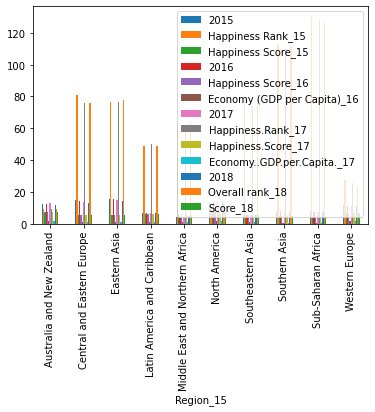

In [27]:
all_data_plot = visual_filtered.groupby('Region_15').mean().plot.bar()

In [28]:
visual_filtered_2 = visual_filtered.drop(visual_filtered.columns[[2,3,4,5,8,10,11,12,13,14,15,16,17,18,19]], axis=1)
visual_filtered_2.rename(columns = {'2015':'Suicide Rate', 'Happiness Score_15':'Happiness Score', 'Region_15':'Regions'}, inplace=True)
visual_filtered_2

,Country Name,Country Code,Suicide Rate,Regions,Happiness Score
0,Afghanistan,AFG,4.0,Southern Asia,3.575
1,Angola,AGO,6.5,Sub-Saharan Africa,4.033
2,Albania,ALB,4.8,Central and Eastern Europe,4.959
3,United Arab Emirates,ARE,6.5,Middle East and Northern Africa,6.901
4,Argentina,ARG,8.3,Latin America and Caribbean,6.574
...,...,...,...,...,...
124,Uzbekistan,UZB,9.2,Central and Eastern Europe,6.003
125,Vietnam,VNM,7.7,Southeastern Asia,5.360
126,South Africa,ZAF,24.5,Sub-Saharan Africa,4.642
127,Zambia,ZMB,8.7,Sub-Saharan Africa,5.129


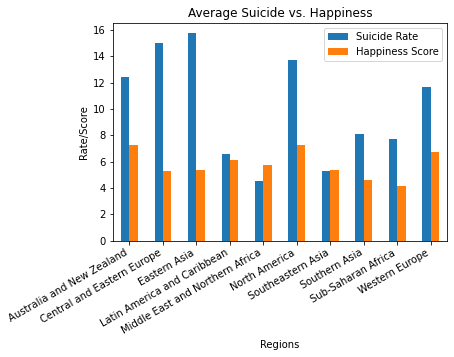

<Figure size 432x288 with 0 Axes>

In [29]:
visual_filtered_2.groupby('Regions').mean().plot.bar()
plt.title('Average Suicide vs. Happiness')
plt.ylabel('Rate/Score')
plt.xticks(rotation=30, horizontalalignment="right")
plt.show()
plt.savefig('Average Suicide vs Happiness Bar.png',dpi=300, bbox_inches = "tight")

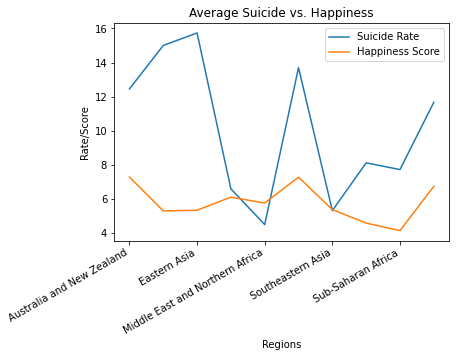

<Figure size 432x288 with 0 Axes>

In [31]:
visual_filtered_2.groupby('Regions').mean().plot.line()
plt.title('Average Suicide vs. Happiness')
plt.ylabel('Rate/Score')
plt.xticks(rotation=30, horizontalalignment="right")
plt.show()
plt.savefig('Average Suicide vs Happiness Line.png')